### Overview Dataset

"Data Komponen Beton".

Data set ini berisikan beberapa kategori sebagai berikut
* cement (kg)
* slag (blast furnace slag, kg)
* ash (fly ash, kg)
* water (kg)
* superplastic (superplasticizer, kg)
* coarseagg (coarse aggregate, kg)
* fineagg (fine aggregate, kg)
* age (days, 1-365)
* strength (Concrete compressive strength, MPa)

# Exploratory Data Analysis (EDA)


<a id="1"></a>

# 1. Pengambilan Data:

## 1.1 Import packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 1.2 Import data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv")
data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


# 2. EDA

## 2.1.Univariate analysis
<a id="2"></a>

## 2.1.1 [Cement]

### **i.	Distribusi**

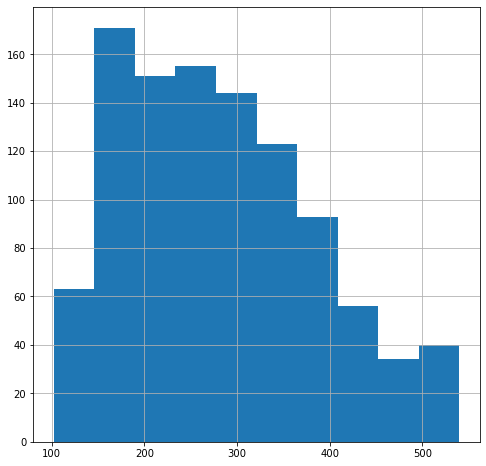

In [ ]:
# Buat diagram di sini
data['cement'].hist(figsize=(8,8))
plt.show()

### **ii.	Deskripsi**

Sehingga Atribut "cement" disini tidak simetris.
Kemudian miring ke Kanan.
Berat minimum & maksimum cement adalah 102 dan 502 K

<a id="3"></a>
# 2.2.Bivariate analysis

## 2.2.1 [Cement]

### i. **Boxplot**

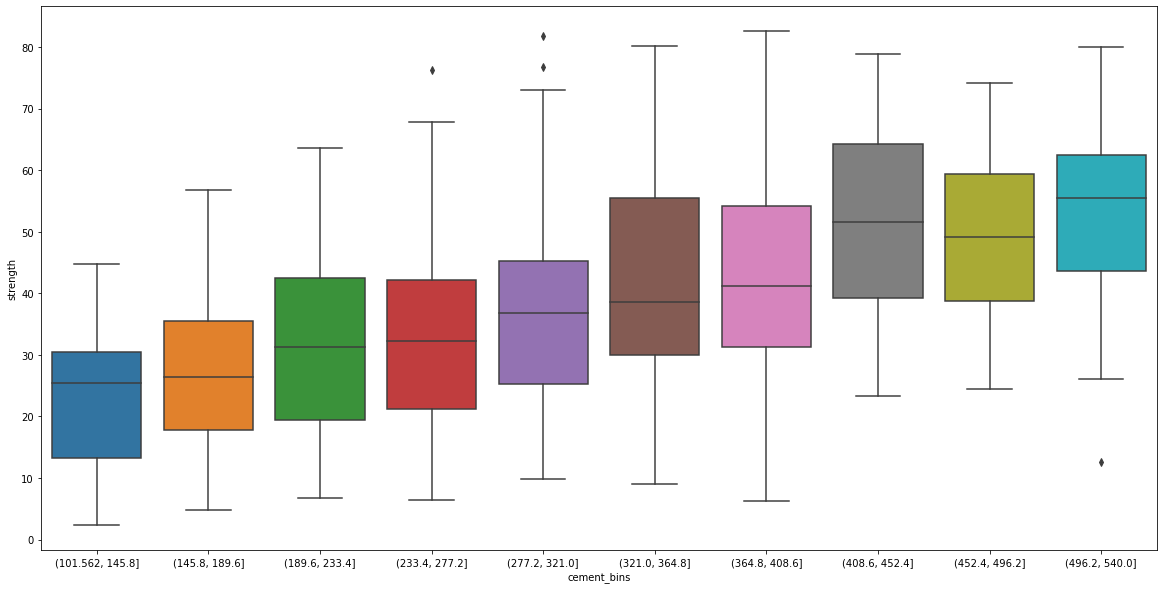

In [ ]:
# Buat diagram di sini
data['cement_bins'] = pd.cut(data['cement'], bins=10)
fig = plt.figure(figsize=(20,10))
sns.boxplot(x="cement_bins", y="strength", data=data)
plt.show()

### ii. Deskripsi

Berdasarkan grafik diatas, semakin banyak semen yang digunakan, metriks strength akan semakin tinggi.
Strength paling kecil pada penggunaan semen 100 Kg hingga 145 Kg.

### iii. Uji Hipotesis
**Two sampled T-test** :-Uji Independent Samples t Test atau 2-sample t-test membandingkan rata-rata dua kelompok independen untuk menentukan apakah ada bukti statistik bahwa rata-rata populasi terkait berbeda secara signifikan.


Tentukan null dan alternate hypothesis.

    Secara umum, null hypothesis akan menyatakan bahwa kedua populasi yang diuji tidak memiliki perbedaan yang signifikan secara statistik.
    alternate hypothesis akan menyatakan bahwa ada perbedaan.

Dalam contoh ini kita dapat mengatakan bahwa:
*  Null Hypothesis :- tidak ada perbedaan Rerata usia kelompok pendapatan >50k dan kelompok pendapatan <=50k.
*  Alternate Hypothesis :- ada perbedaan Rerata usia kelompok pendapatan >50k dan kelompok pendapatan <=50k.

In [ ]:
# Buat uji hipotesis untuk menentukan null atau alternate hypothesis
import random
from scipy.stats import ttest_ind

cement_mean = data['cement'].mean()
data = data[(np.abs(stats.zscore(data["strength"])) < 3)]

strength_1 = data[data['cement']<cement_mean]['age']
strength_0 = data[data['cement']<cement_mean]['age']

strength_0 = strength_0.values.tolist()
strength_0 = random.sample(strength_0, 100)
strength_1 = strength_1.values.tolist()
strength_1 = random.sample(strength_1, 100)

ttest,pval = ttest_ind(strength_1, strength_0, equal_var = False)
print('ttest', ttest)
print('p value', pval)

if pval < 0.05:
    print('Null Hipotesis Ditolak')
else:
    print('Null Hipotesis Diterima')

ttest 0.9038060092182845
p value 0.3672010948299611
Null Hipotesis Diterima


### iv. Kesimpulan akhir

Maka dengan adanya perbedaan yang signifikan pada sebuah kelompok semen yang memiliki berat dibawah rata-rata dan kelompok semen yang memiliki berat diatas rata-rata. program ini membuktikan bahwa berat semen yang digunakan dalam membangun beton memiliki peranan yang penting dalam kekuatan beton tersebut.